<a href="https://colab.research.google.com/github/lhggomes/pokemon-data-analysis/blob/master/pokemon_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Connecting Google Drive into Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**IMPORTAÇÃO DE DADOS E PRÉ-PROCESSAMENTO UTILIZANDO PANDAS**

Pandas é a biblioteca para tratamento de dados e manipulação em DataFrames, muito utilizada juntamente, com a Numpy, para tramento de matrizes e vetores de alto volume (imagens, por exemplo)

Doc: https://pandas.pydata.org/


In [3]:
# Uses DataFrame.read_excel, to import the data from Google Drive
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/AI/pokemon-data.xlsx')
df.head()

,pokedex_number,name,german_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,1,Normal,Seed PokÃ©mon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318,45,49,49,65,65,45,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,1,Normal,Seed PokÃ©mon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405,60,62,63,80,80,60,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,1,Normal,Seed PokÃ©mon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525,80,82,83,100,100,80,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,1,Normal,Seed PokÃ©mon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625,80,100,123,122,120,80,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,1,Normal,Lizard PokÃ©mon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309,39,52,43,60,50,65,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [4]:
# Removing columns not needed for the training and analysis process
df = df.drop(columns=['name','pokedex_number', 'german_name', 'species', 'type_number', 'height_m', 'weight_kg', 
                      'abilities_number', 'catch_rate', 'base_friendship', 'base_experience', 
                      'egg_type_number', 'egg_type_1', 'egg_type_2', 'percentage_male', 'egg_cycles', 'ability_2', 'ability_hidden'])
df.head()

,generation,status,type_1,type_2,ability_1,total_points,hp,attack,defense,sp_attack,sp_defense,speed,growth_rate,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Normal,Grass,Poison,Overgrow,318,45,49,49,65,65,45,Medium Slow,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,Normal,Grass,Poison,Overgrow,405,60,62,63,80,80,60,Medium Slow,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,1,Normal,Grass,Poison,Overgrow,525,80,82,83,100,100,80,Medium Slow,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,1,Normal,Grass,Poison,Thick Fat,625,80,100,123,122,120,80,Medium Slow,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,1,Normal,Fire,NaN,Blaze,309,39,52,43,60,50,65,Medium Slow,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [5]:
# Let's check the size of our dataframe
df.shape

(1045, 31)

**PROCESSO DE CLUSTERIZAÇÃO - UTILIZAÇÃO SKLEARN**

Vamos utilizara biblioteca de treinamento de máquina e analises de dados, SkLearn

In [6]:
# Starting the creation of the Clusters for A.I
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=4, random_state=0)

df['cluster'] = kmeans.fit_predict(df[['attack', 'defense']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to dataframe
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#333']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})



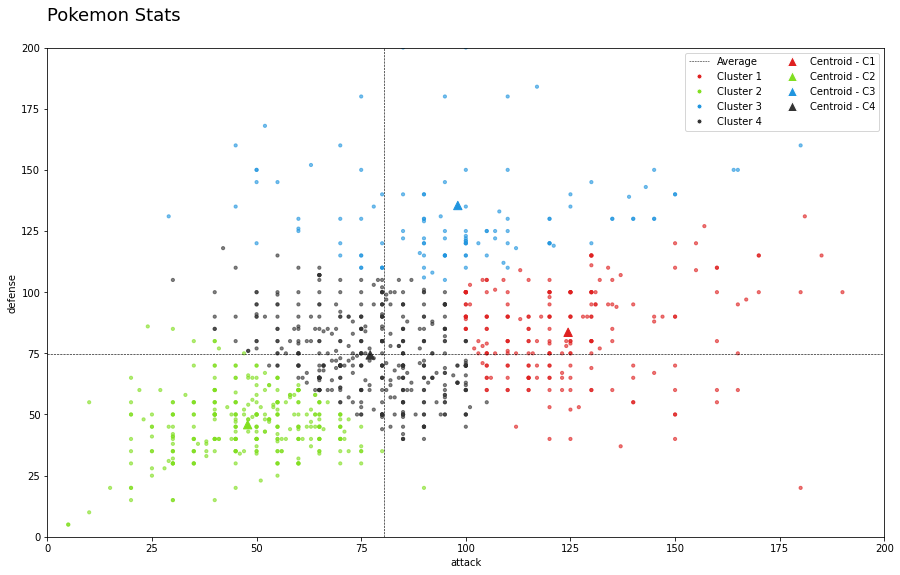

In [7]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(15,9))


plt.scatter(df.attack, df.defense, c=df.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)

# Attack and Defense Mean
plt.plot([df.attack.mean()]*2, [0,200], color='black', lw=0.6, linestyle='--')
plt.xlim(0,200)
plt.plot([0,200], [df.defense.mean()]*2, color='black', lw=0.6, linestyle='--')
plt.ylim(0,200)

# Creating the Legend Box 
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)


plt.legend(handles=legend_elements, loc='upper right', ncol=2)
plt.title('Pokemon Stats\n', loc='left', fontsize=18)
plt.xlabel('attack')
plt.ylabel('defense')
plt.show()

**PROCESSO DE ASSOCIAÇÃO - ALGORTIMO APRIORI**

In [8]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=8788f09aa5c224322fd91c39c5fd6aacbc2f43b4f9ef0826557b1f0f4ea09537
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [9]:
from apyori import apriori

records = []
df_apriori = pd.read_excel('/content/drive/MyDrive/AI/pokemon-data.xlsx')
df_apriori = df_apriori[df_apriori['generation'] == 1]

matches = ['Alolan', 'Mega', 'Galarian', 'Partner']
df_apriori = df_apriori[~df_apriori['name'].str.contains('|'.join(matches))]
df_apriori = df_apriori[['type_1', 'type_2']]
for i in range(0, df_apriori.count()[0]):
    records.append([str(df_apriori.values[i,j]) for j in range(0, 2)])





In [10]:
_# Running the process of Confidence
association_rules = apriori(records, min_support=0.0045, min_confidence=0.5, min_lift=1.2, min_length=2)
association_results = list(association_rules)

print(f'Numero de Regras: {len(association_results)}')
print(f'Association: {association_results}')
print(f'association_rules: {association_rules}')

Numero de Regras: 7
Association: [RelationRecord(items=frozenset({'Electric', 'Steel'}), support=0.013245033112582781, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Steel'}), items_add=frozenset({'Electric'}), confidence=1.0, lift=16.77777777777778)]), RelationRecord(items=frozenset({'Fighting', 'nan'}), support=0.046357615894039736, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Fighting'}), items_add=frozenset({'nan'}), confidence=0.875, lift=1.5729166666666667)]), RelationRecord(items=frozenset({'Fire', 'nan'}), support=0.06622516556291391, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Fire'}), items_add=frozenset({'nan'}), confidence=0.8333333333333334, lift=1.4980158730158732)]), RelationRecord(items=frozenset({'Poison', 'Ghost'}), support=0.019867549668874173, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Ghost'}), items_add=frozenset({'Poison'}), confidence=1.0, lift=4.575757575757575)]), RelationRecord(items=frozenset({'Gra

In [11]:
for item in association_results:
  try:
      # first index of the inner list
      # Contains base item and add item
      pair = item[0]
      items = [x for x in pair]
      print("Rule: " + items[0] + " -> " + items[1])

      #second index of the inner list
      print("Support: " + str(round(item[1], 2)))

      #third index of the list located at 0th
      #of the third index of the inner list

      print("Confidence: " + str(round(item[2][0][2] * 100, 2)))
      print("Lift: " + str(round(item[2][0][3], 2)))
      print("=====================================")

  except IndexError:
    pass

Rule: Electric -> Steel
Support: 0.01
Confidence: 100.0
Lift: 16.78
Rule: Fighting -> nan
Support: 0.05
Confidence: 87.5
Lift: 1.57
Rule: Fire -> nan
Support: 0.07
Confidence: 83.33
Lift: 1.5
Rule: Poison -> Ghost
Support: 0.02
Confidence: 100.0
Lift: 4.58
Rule: Grass -> Poison
Support: 0.06
Confidence: 64.29
Lift: 2.94
Rule: Rock -> Ground
Support: 0.04
Confidence: 54.55
Lift: 5.88
Rule: Water -> Ice
Support: 0.02
Confidence: 60.0
Lift: 2.83


**PROCESSO DE CLASSIFICAÇÃO - SKLEARN**

O scikit-learn é uma biblioteca da linguagem Python desenvolvida especificamente para aplicação prática de machine learning. Esta biblioteca dispõe de ferramentas simples e eficientes para análise preditiva de dados, é reutilizável em diferentes situações, possui código aberto, sendo acessível a todos e foi construída sobre os pacotes NumPy, SciPy e matplotilib.





In [12]:

x = df[['hp'	, 'attack'	, 'defense'	, 'sp_attack'	, 'sp_defense'	,'speed']]
y = df['status']




In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score

SEED = 20
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


A acurácia foi 89.31%


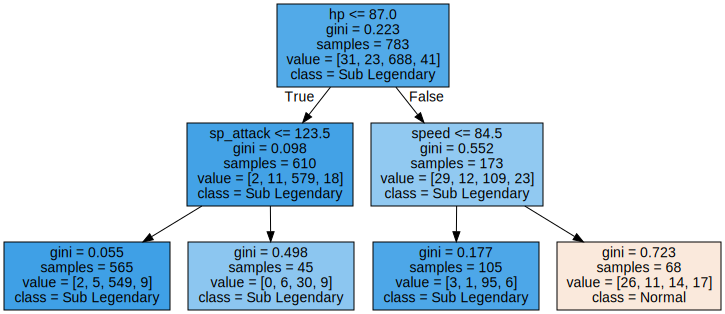

In [14]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

class_names = ["Normal", "Legendary", "Sub Legendary", "Mythical"]
features = x.columns
dot_data = export_graphviz(modelo, out_file=None, feature_names=x.columns, filled=True, class_names=class_names)
graphviz.Source(dot_data)
